In [11]:
import pandas as pd  
import numpy as np 
import seaborn as sns  
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 

In [12]:
df = sns.load_dataset('titanic')

In [13]:
# Features 
feature = ['pclass','sex','age','fare','survived']

In [14]:
numeric_features = ['age', 'fare']
numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [15]:
categorical_features = ['pclass', 'sex', 'survived']  
categorical_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preproces = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric_features),
        ('cat', categorical_transform, categorical_features)
    ]
)

In [17]:
# Applyimg preprocess to whole dataset
x = preproces.fit_transform(df[feature])

In [18]:
# Perform SVD
svd = TruncatedSVD(n_components=4)
y = svd.fit_transform(x)

print("Sigular Values:\t",svd.singular_values_)
print("Experience Varaiance Ratio:\t",svd.explained_variance_ratio_)

Sigular Values:	 [38.2526537  32.93952868 29.59422709 22.04060678]
Experience Varaiance Ratio:	 [0.12993092 0.28215292 0.26722718 0.1476937 ]


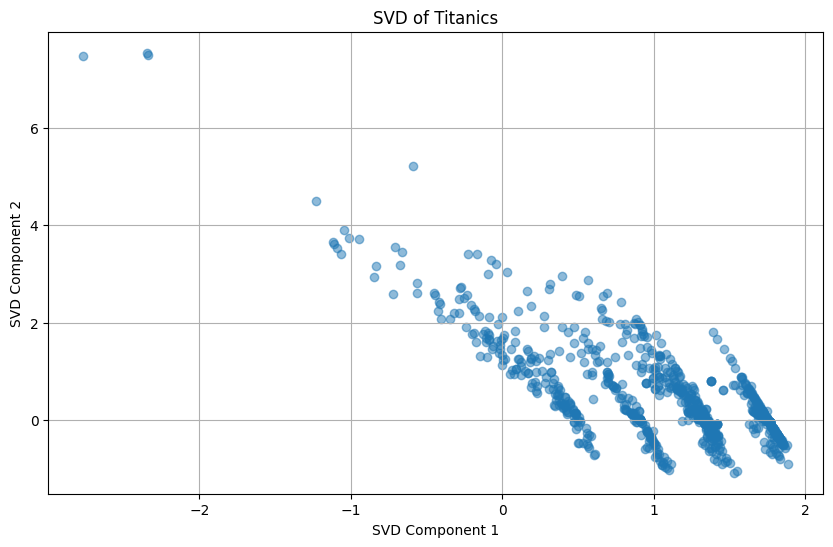

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y[:,0],y[:,1],alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD of Titanics")
plt.grid(True)
plt.show()